In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("insurance.xlsx")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df = df.drop_duplicates()

df.duplicated().sum()

0

In [9]:
object_df = df.select_dtypes(include='object')
object_df.head(2)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast


In [10]:
object_df.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [11]:
numeric_df = df.select_dtypes(include='number')
numeric_df = numeric_df.drop('children', axis = 1)

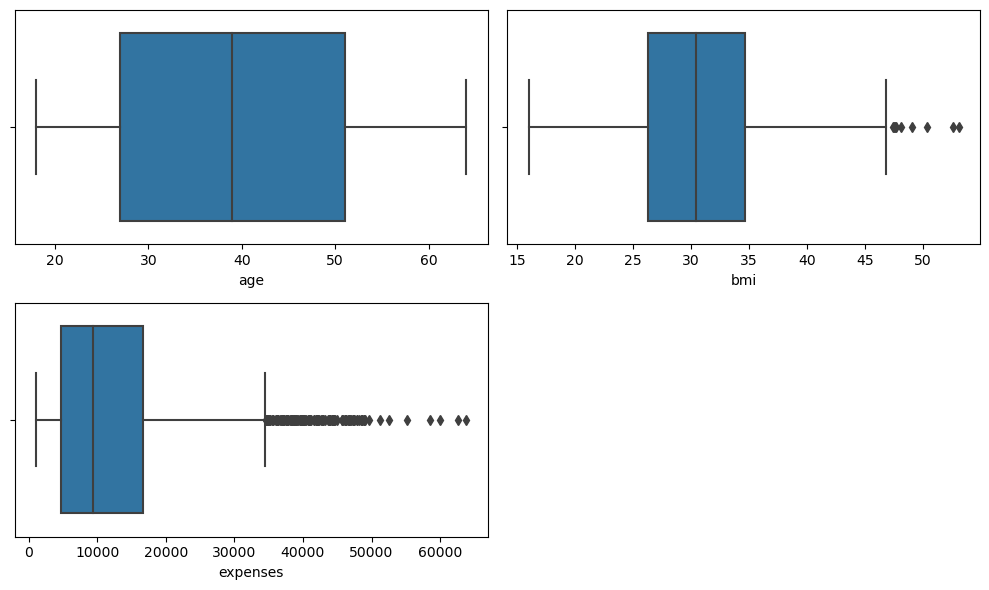

In [12]:
plt.figure(figsize = (10,6))
i = 1

for cols in numeric_df.columns:
    plt.subplot(2,2,i);i += 1
    sns.boxplot(x = numeric_df[cols], data = df)
    plt.tight_layout()
plt.show()

In [13]:
import warnings
warnings.filterwarnings('ignore')

df.skew()

age         0.054781
bmi         0.284463
children    0.937421
expenses    1.515391
dtype: float64

In [14]:
df.skew()

age         0.054781
bmi         0.284463
children    0.937421
expenses    1.515391
dtype: float64

In [15]:
lower_limit = numeric_df.quantile(0.02)
upper_limit = numeric_df.quantile(0.98)
print('lower limit--------------\n',lower_limit,'\n\n\nupper limit-------------\n', upper_limit)

lower limit--------------
 age           18.0000
bmi           19.2720
expenses    1621.7288
Name: 0.02, dtype: float64 


upper limit-------------
 age            63.0000
bmi            43.9280
expenses    46677.3216
Name: 0.98, dtype: float64


In [16]:
df[(((df.age < lower_limit[0])|(df.age > upper_limit[0])) | ((df.bmi < lower_limit[1])|(df.bmi > upper_limit[1])))].shape

(76, 7)

In [17]:
df = df[~(((df.age < lower_limit[0])|(df.age > upper_limit[0])) | ((df.bmi < lower_limit[1])|(df.bmi > upper_limit[1])))]

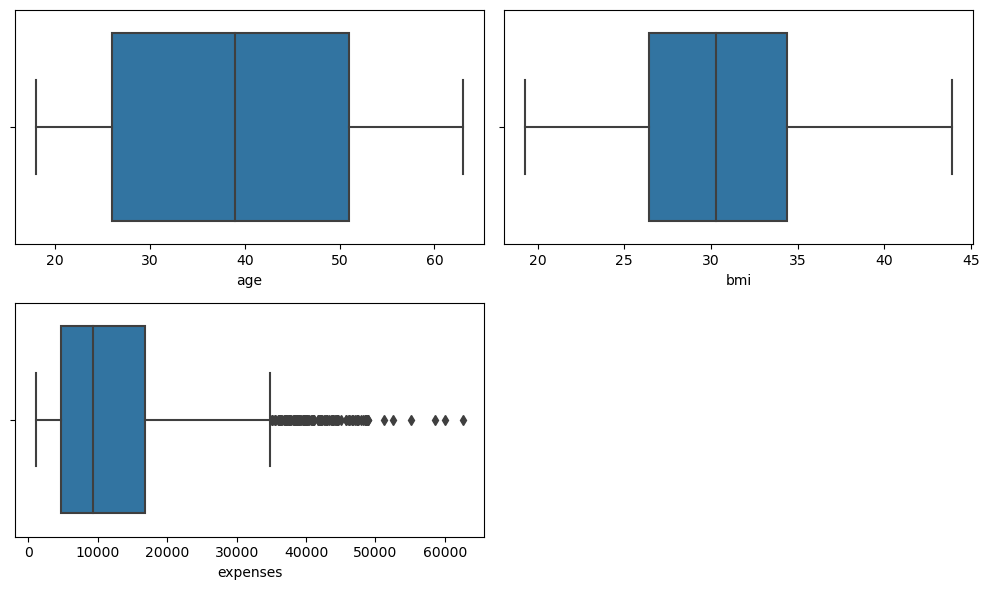

In [18]:
numeric_df = df.select_dtypes(include='number')
numeric_df = numeric_df.drop(['children'], axis = 1)

plt.figure(figsize = (10,6))
i = 1

for cols in numeric_df.columns:
    plt.subplot(2,2,i);i += 1
    sns.boxplot(x = numeric_df[cols], data = df)
    plt.tight_layout()
plt.show()

In [19]:
numeric_df.skew()

age         0.041867
bmi         0.157661
expenses    1.504142
dtype: float64

In [20]:
df.shape

(1261, 7)

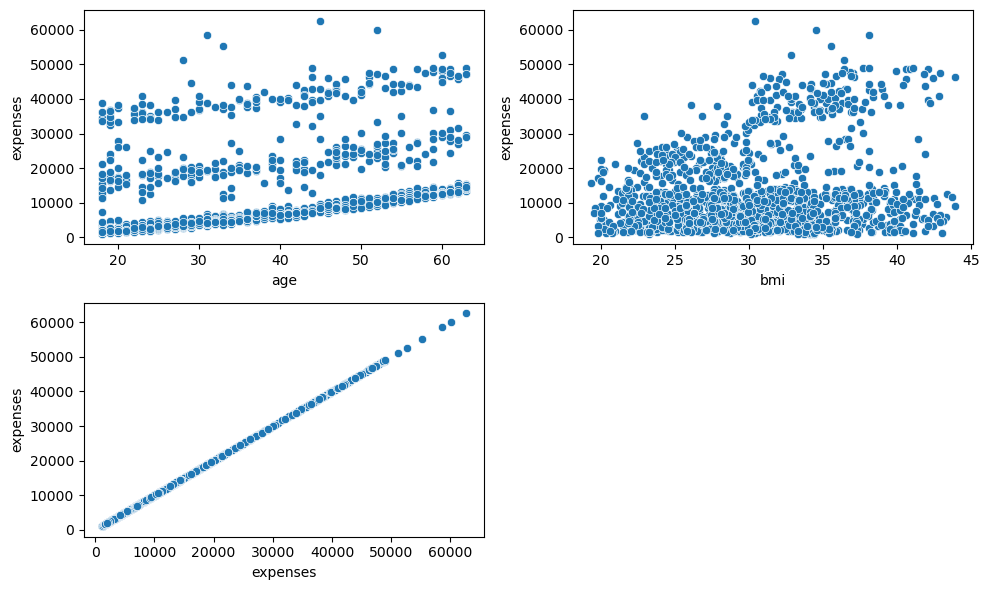

In [21]:
plt.figure(figsize = (10,6))
i = 1

for cols in numeric_df.columns:
    plt.subplot(2,2,i);i += 1
    sns.scatterplot(x = numeric_df[cols],y = df.expenses, data = df)
    plt.tight_layout()
plt.show()

<Axes: >

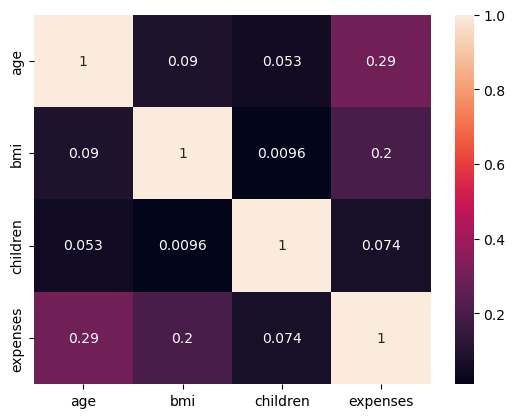

In [22]:
sns.heatmap(df.corr(), annot = True)

In [23]:
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


In [24]:
df.nunique()

age           46
sex            2
bmi          233
children       6
smoker         2
region         4
expenses    1261
dtype: int64

In [25]:
# encoding Sex column
df['sex'].replace({'female':0, 'male':1}, inplace = True)
df['smoker'].replace({'no':0, 'yes':1}, inplace = True)

In [26]:
df = pd.get_dummies(df, columns=['region'], prefix='region')

In [27]:
df.head(2)

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0


In [28]:
df = df.drop(columns=['region_northwest'])

In [29]:
X = df.drop('expenses', axis = 1)
y = df.expenses

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9) 

In [31]:
from sklearn.linear_model import Ridge

Ridge_base = Ridge()
Ridge_base.fit(x_train, y_train)

#prediction 
ypred_train = Ridge_base.predict(x_train)
ypred_test = Ridge_base.predict(x_test)

#evalution
print("train R2: ", Ridge_base.score(x_train,y_train))
print("test R2: ", Ridge_base.score(x_test,y_test))

from sklearn.model_selection import cross_val_score

print(cross_val_score(Ridge_base, X, y, cv=5 ,).mean())

train R2:  0.75883611908375
test R2:  0.7097471224633596
0.7472088231540187


In [32]:
# Applying Hyperperameter tuning for lasso regression
from sklearn.model_selection import GridSearchCV

estimator = Ridge()

param_grid = {'alpha':[0.1,0.2,0.5,0.7,1,10,30,50,70,100]}

model_hp = GridSearchCV(estimator, param_grid, cv=5, scoring="neg_mean_squared_error")
model_hp.fit(x_train, y_train)
model_hp.best_params_

{'alpha': 0.5}

In [33]:
from sklearn.linear_model import Ridge

Ridge_base = Ridge(alpha=0.5)
Ridge_base.fit(x_train, y_train)

#prediction 
ypred_train = Ridge_base.predict(x_train)
ypred_test = Ridge_base.predict(x_test)

#evalution
print("train R2: ", Ridge_base.score(x_train,y_train))
print("test R2: ", Ridge_base.score(x_test,y_test))

from sklearn.model_selection import cross_val_score

print(cross_val_score(Ridge_base, X, y, cv=5 ,).mean())

train R2:  0.7588532185698341
test R2:  0.7096569732319269
0.7472192900091013


In [36]:
x_train.head(3)

,age,sex,bmi,children,smoker,region_northeast,region_southeast,region_southwest
573,62,0,36.9,1,0,1,0,0
486,54,0,21.5,3,0,0,0,0
608,28,1,27.0,2,0,1,0,0


In [37]:
Ridge_base.predict([[62,0,36.9,1,0,1,0,0]])

array([17520.00946067])

In [38]:
y_train

573    31620.00
486    12475.35
608     4435.09
30     35585.58
750    19539.24
         ...   
57     34303.17
529     1708.00
678    12363.55
363     2597.78
400     9264.80
Name: expenses, Length: 1008, dtype: float64

In [40]:
Ridge_base.predict([[31,0,25.74,0,0,1,0,0]])

array([4505.06526667])